# AML Homework 2

# Adam Finch (finchca)

In [1]:
#import necessary packages

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, OrdinalEncoder
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Question 1: Predicting the Price of a Used Vehicle (40 points)

## Step 1: Identify Features

#### Assemble a dataset consisting of features and target (I do this with a dataframe)

In [2]:
#Read in the csv file (I downloaded it from Kaggle and put a copy in my current directory):
df = pd.read_csv('vehicles.csv')

#### Exploratory Data Analysis: 

In [3]:
df.shape

(426880, 26)

There are 426,880 vehicles in the data set, and 26 features (including the target variable price). 

###  Are there any features that should be excluded because they leak the target information?

In [4]:
#Here is a random selection of 10 observations to get a better idea of what each column contains

df.sample(10, random_state = 421)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
84058,7313871170,https://hartford.craigslist.org/ctd/d/hartford...,hartford,https://hartford.craigslist.org,38590,2011.0,mercedes-benz,sl-class sl 550,good,NaN,...,NaN,convertible,red,https://images.craigslist.org/00E0E_byFjaKykhK...,Carvana is the safer way to buy a car During t...,NaN,ct,41.760000,-72.680000,2021-04-28T12:21:35-0400
49371,7314754992,https://reno.craigslist.org/ctd/d/atlanta-2020...,reno / tahoe,https://reno.craigslist.org,34990,2020.0,jeep,wrangler sport suv 2d,good,6 cylinders,...,NaN,other,NaN,https://images.craigslist.org/00f0f_d8xhIBVcev...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-30T06:21:23-0700
299120,7308310725,https://dayton.craigslist.org/ctd/d/tallmadge-...,dayton / springfield,https://dayton.craigslist.org,22900,2017.0,ford,transit 150 cargo van,like new,6 cylinders,...,full-size,van,white,https://images.craigslist.org/00d0d_4UfTXR40ZO...,"2017 FORD TRANSIT 150 CARGO VAN, THIS CARGO VA...",NaN,oh,41.101694,-81.456137,2021-04-17T12:52:36-0400
284614,7313380131,https://nh.craigslist.org/ctd/d/londonderry-20...,new hampshire,https://nh.craigslist.org,8995,2014.0,chevrolet,equinox,NaN,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00q0q_9iNOEgauWH...,2014 Chevrolet Chevy Equinox LS 4dr SUV Of...,NaN,nh,42.914352,-71.389906,2021-04-27T12:38:52-0400
71489,7305796019,https://yubasutter.craigslist.org/ctd/d/sacram...,yuba-sutter,https://yubasutter.craigslist.org,12995,2018.0,kia,optima,NaN,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/01515_gMoIdOJmuG...,2018 Kia Optima Hybrid Premium 4dr Sedan O...,NaN,ca,38.611927,-121.423118,2021-04-12T12:22:26-0700
22185,7311316322,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,https://bakersfield.craigslist.org,22590,2016.0,chevrolet,camaro lt coupe 2d,good,NaN,...,NaN,coupe,silver,https://images.craigslist.org/00B0B_fx0XdTj9cZ...,Carvana is the safer way to buy a car During t...,NaN,ca,35.380000,-119.020000,2021-04-23T07:10:51-0700
343783,7303031126,https://providence.craigslist.org/cto/d/rivers...,rhode island,https://providence.craigslist.org,29500,2018.0,mercedes-benz,benz,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01515_hQ9Xa3QGJ5...,"12,500 original mile, 3rd row seating, barn do...",NaN,ri,41.772300,-71.354200,2021-04-07T08:10:26-0400
182914,7308181265,https://baltimore.craigslist.org/ctd/d/dundalk...,baltimore,https://baltimore.craigslist.org,10500,2009.0,nissan,altima coupe,NaN,NaN,...,NaN,NaN,red,https://images.craigslist.org/01010_9LVyMF6iFU...,2009 Nissan Altima S Coupe only 98k miles Red ...,NaN,md,39.265500,-76.493500,2021-04-17T09:05:05-0400
3856,7315009152,https://mobile.craigslist.org/ctd/d/foley-2015...,mobile,https://mobile.craigslist.org,14890,2015.0,chevrolet,express 2500 cargo van,excellent,8 cylinders,...,full-size,van,white,https://images.craigslist.org/00m0m_76IkYAlUUW...,EXPRESS G2500 CARGO VAN 4.8 LTR V8 / AUTOMATIC...,NaN,al,30.429711,-87.683198,2021-04-30T15:39:14-0500
42738,7314664606,https://orangecounty.craigslist.org/cto/d/full...,orange county,https://orangecounty.craigslist.org,11999,2001.0,toyota,tacoma,fair,6 cylinders,...,mid-size,NaN,custom,https://images.craigslist.org/00o0o_h74tS38yrP...,"$12,000 obo * V6, 3.4 Liter * 296,861 * Autom...",NaN,ca,33.868000,-117.926500,2021-04-29T20:11:34-0700


As shown above, sometimes the description category leaks information about the price. As such, I will exclude the description column from the data frame. 

In [5]:
df.drop(columns='description', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

It looks like there is a lot of missing data in this data set. I will make sure to clean this up during the preprocessing step.

One thing we can definitely do right away is drop county, since it has 0 non-null values (meaning the whole column is null).

In [7]:
df.drop(columns='county', inplace=True)

### What features are relevant for the prediction task? Show visualizations or statistics to support your selection

In [8]:
#First create a list of all numeric features, and all categorical features:
num_vars = []
cat_vars = []

for column in df.columns:
    if column != 'price':
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            num_vars.append(column)
        else:
            cat_vars.append(column)

print('Categorical Features:')
for i in cat_vars: 
    print(i)
    
print('\nNumeric Features:')
for j in num_vars:
    print(j)
        



Categorical Features:
url
region
region_url
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
size
type
paint_color
image_url
state
posting_date

Numeric Features:
id
year
odometer
lat
long


Next I want to visualize the dependency of the target on each numeric feature via a 2d scatter plot. Because there are so many observations in this data set, I am going to subsample the data before I plot it. 

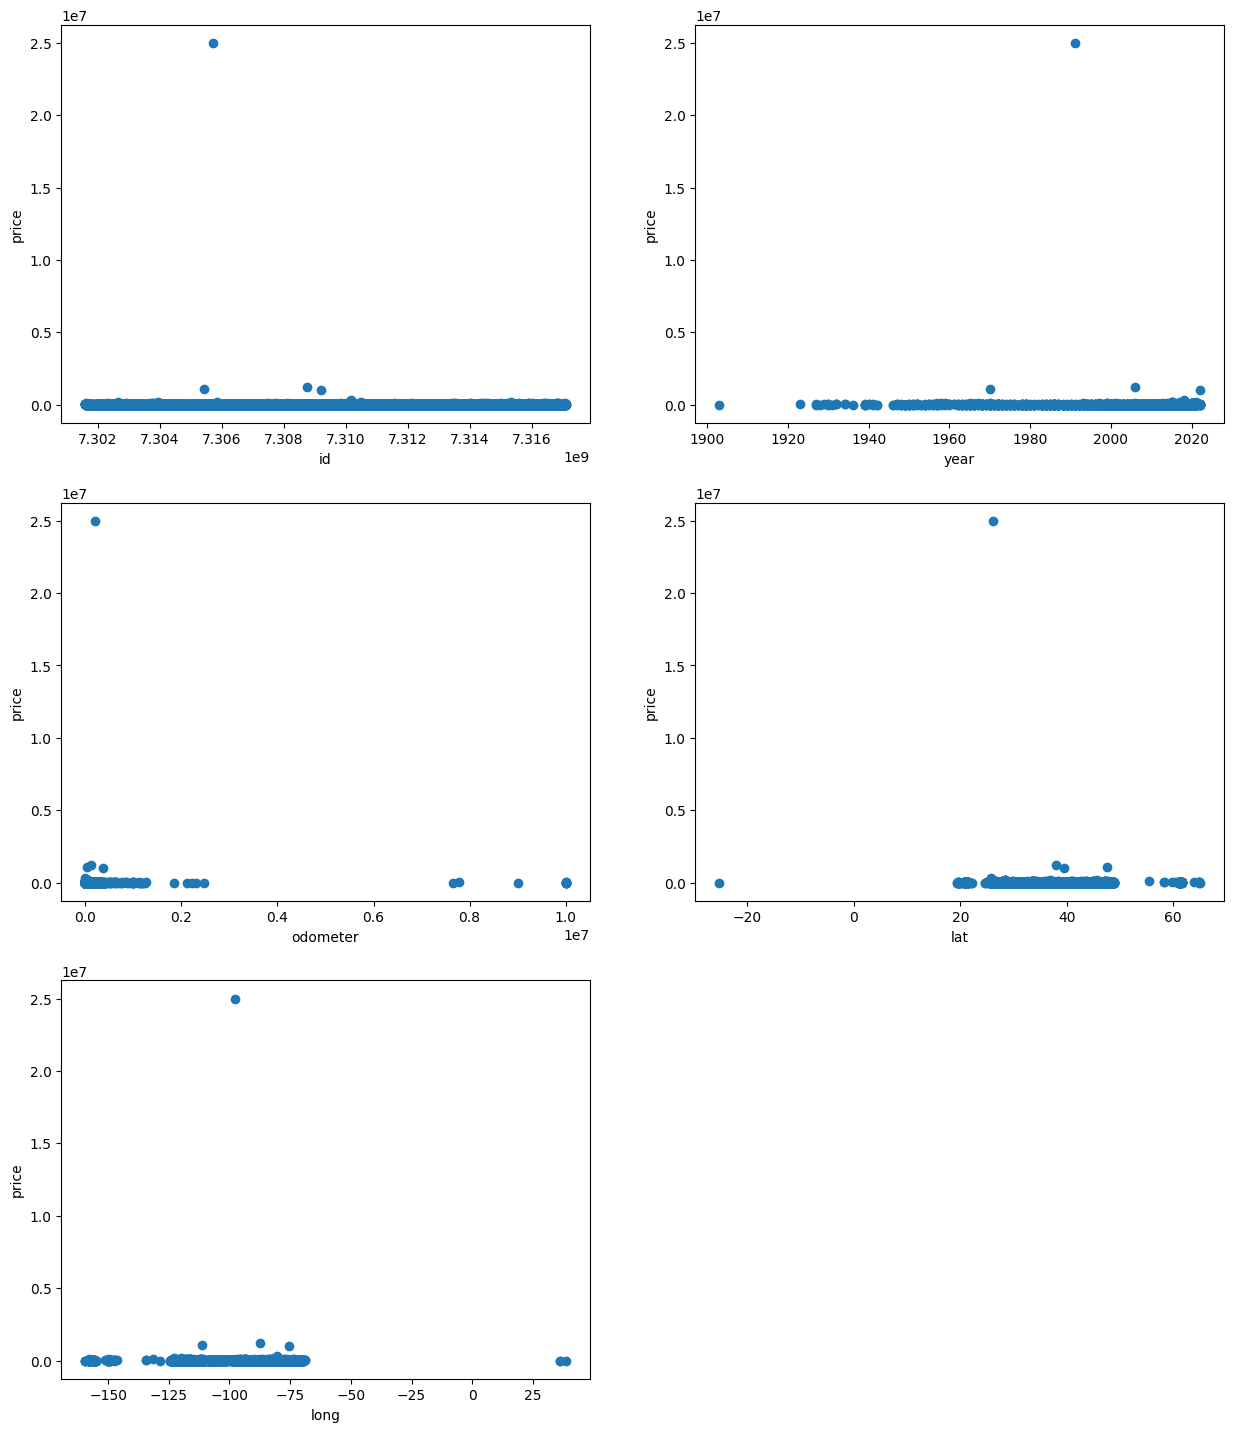

In [9]:
#sub sampled data frame:
df_ss = df.sample(15000, random_state = 42)

plt.figure(figsize=(15,30))


for i, feature in enumerate(num_vars): 
    plot = plt.subplot(5,2,i+1)
    plot.scatter(df_ss[feature], df_ss['price'])
    plot.set_xlabel(feature)
    plot.set_ylabel('price')

plt.show()


There are a few outliers in price making it hard to interpret these scatterplots. I am going to plot the data again, this time only using cars priced at $100,000 or less, and limiting the x-axis of the scatterplots to the range in which most of the data is contained. 

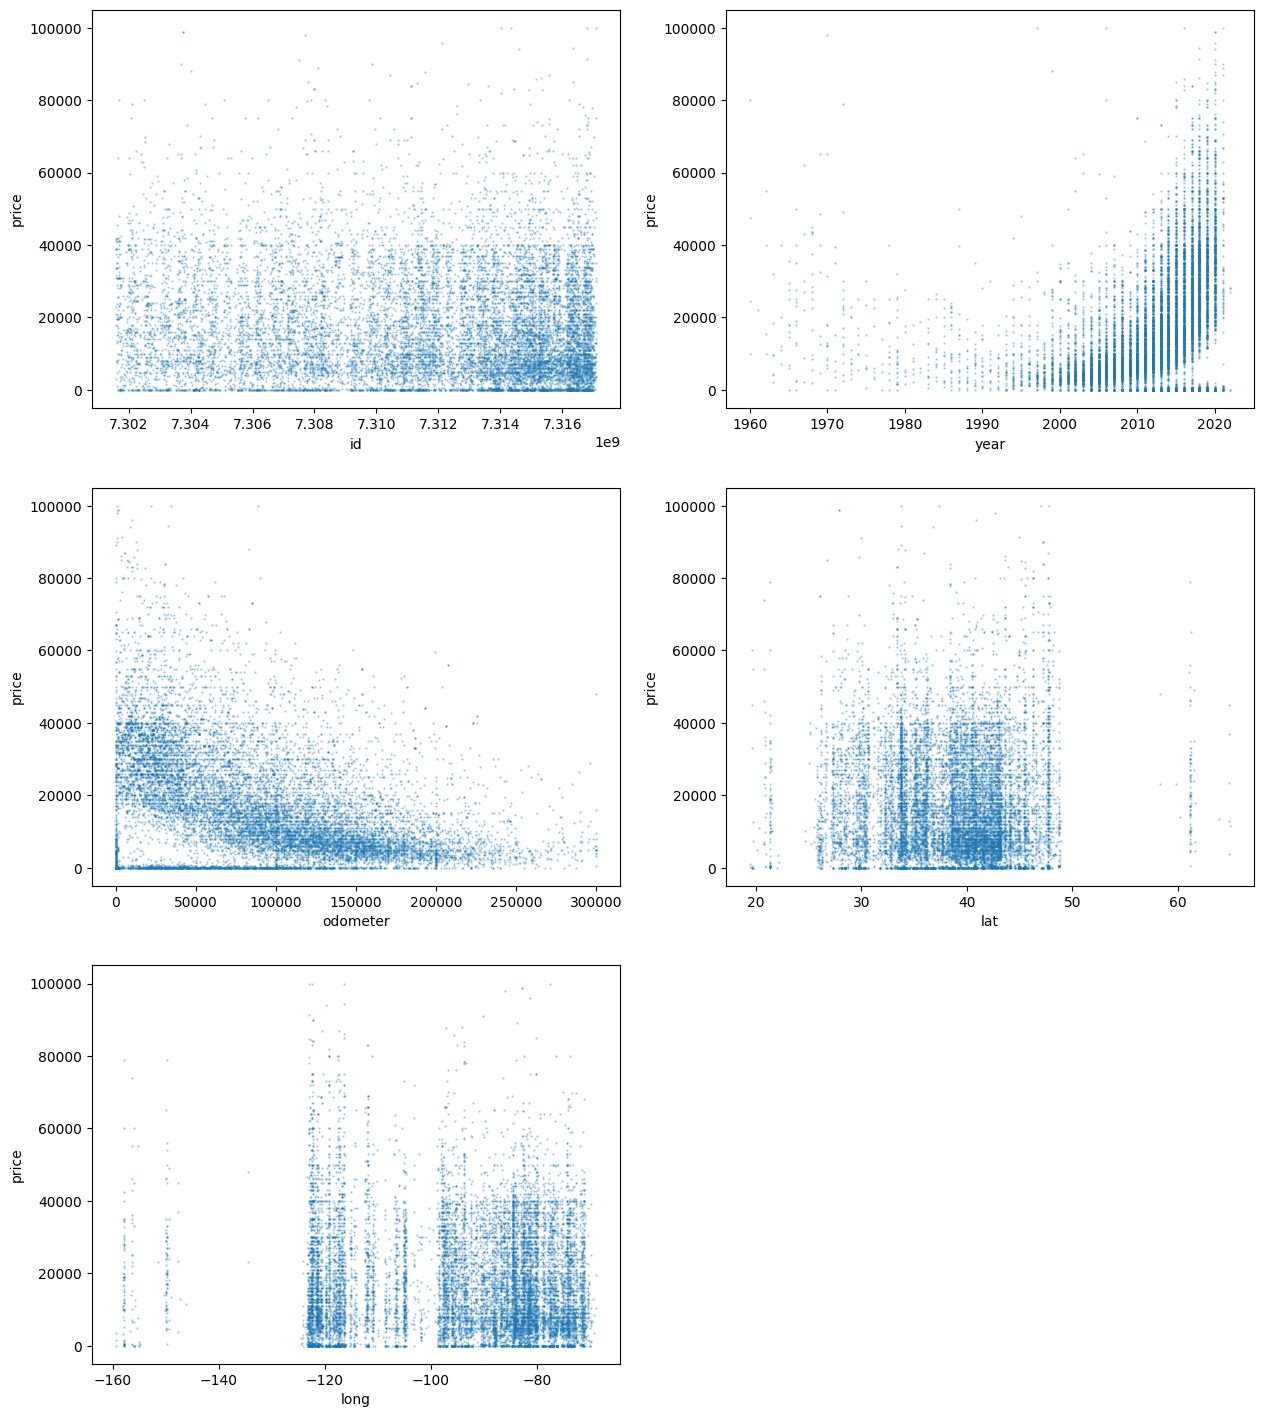

In [10]:
plt.figure(figsize=(15,30))

for i, feature in enumerate(num_vars):
    plot = plt.subplot(5,2,i+1)
    plot.scatter(
        df_ss.query('price <= 100000 and year >= 1960 and odometer <= 300000 and long <= -50 and lat >= 15')[feature], 
        df_ss.query('price <= 100000 and year >= 1960 and odometer <= 300000 and long <= -50 and lat >= 15')['price'], 
        s=0.5, alpha = 0.3)
    plot.set_xlabel(feature)
    plot.set_ylabel('price')

plt.show()

The scatter plots show that the most relevant numeric variables are odometer and year. 

ID number, lat, and long appear to have little to no correlation with the target variable. 

In [11]:
#Next, I need to look at which categorical labels are relevant. I want to see how many unique values are in each column:

for feature in cat_vars:
    print(f"{feature}: {df[feature].nunique()} unique values")

url: 426880 unique values
region: 404 unique values
region_url: 413 unique values
manufacturer: 42 unique values
model: 29667 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118264 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
image_url: 241899 unique values
state: 51 unique values
posting_date: 381536 unique values


From this analysis, it appears that url, VIN, posting date, and image_url are unlikely to have any correlation with price, because there are so many unique values.

In order to visualize how some of the categorical variables with less unique values are correlated with price, I want to make some box plots. 

<Figure size 2000x2000 with 0 Axes>

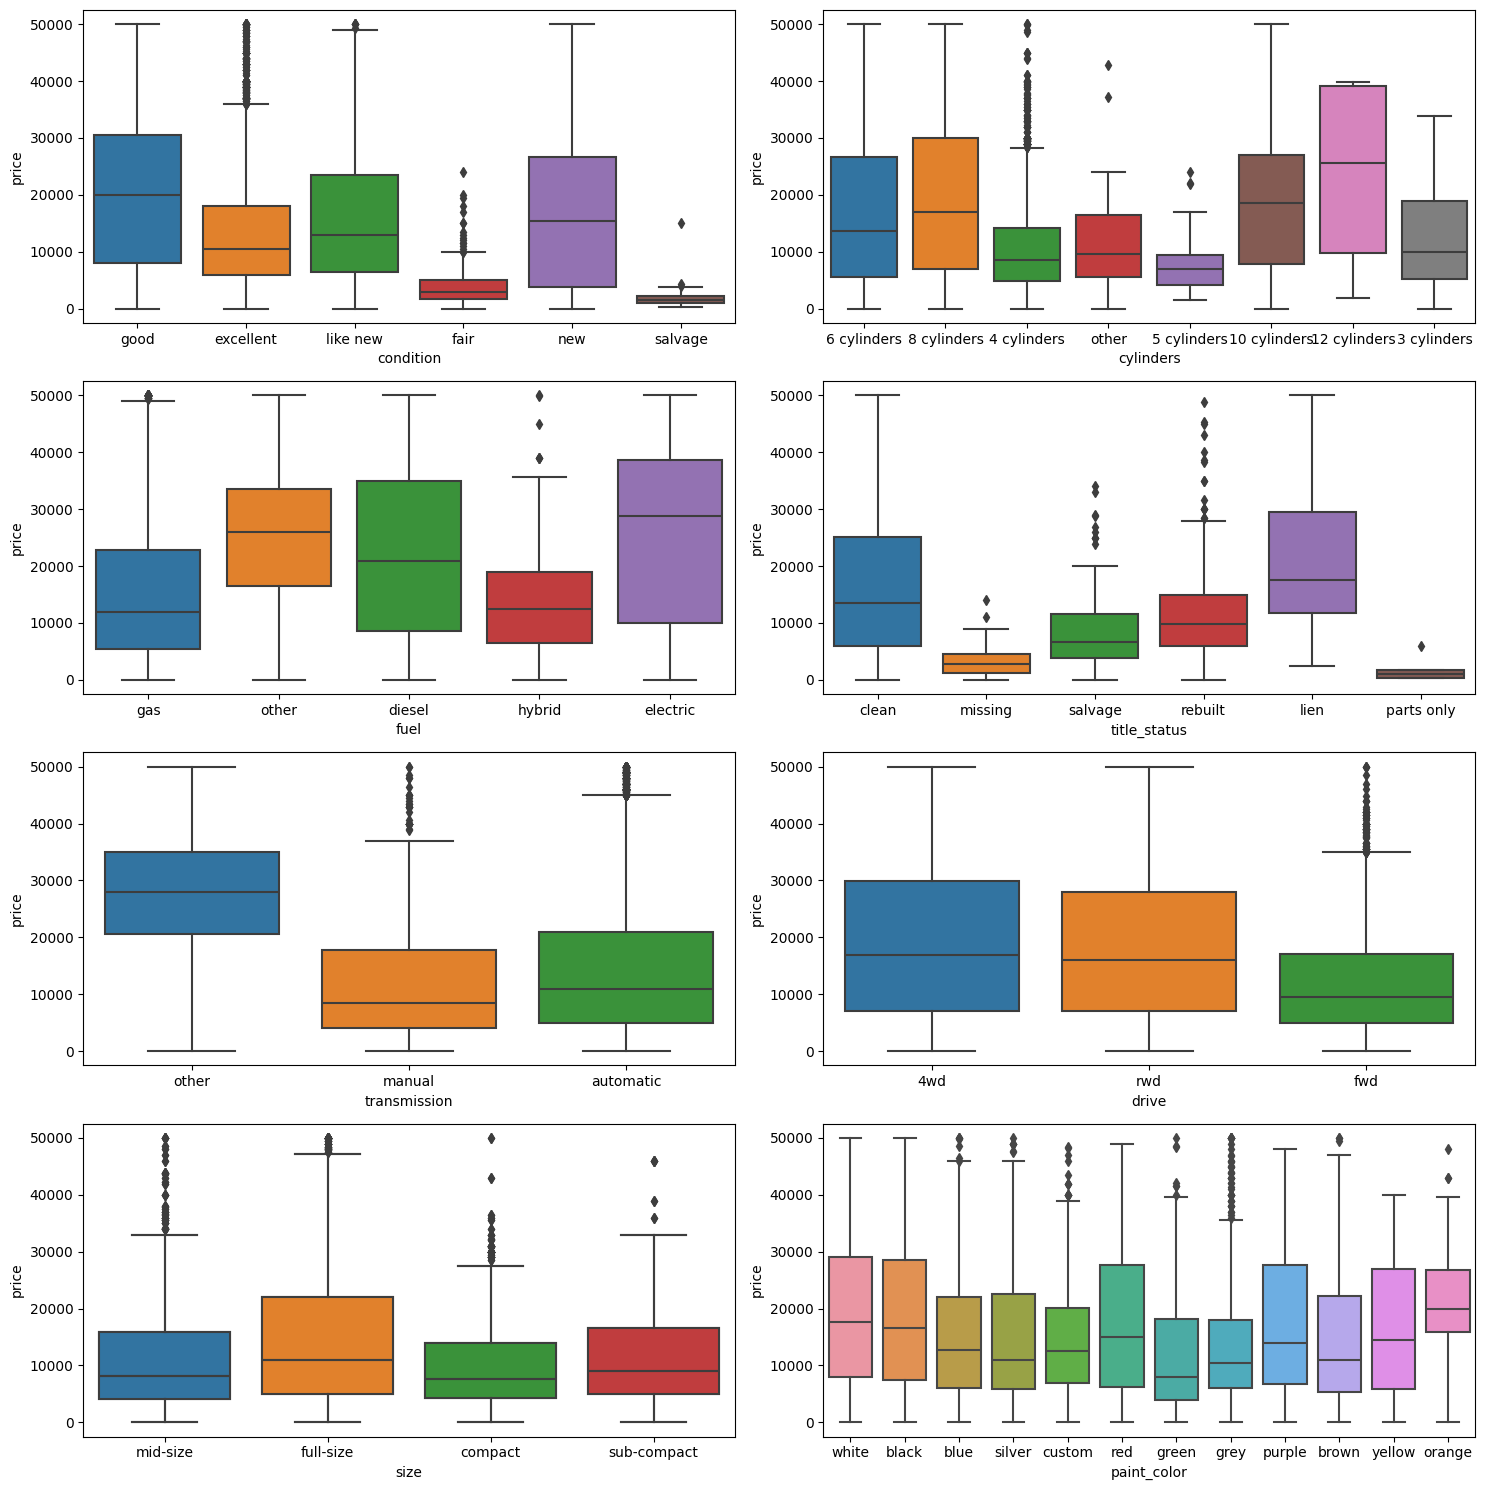

In [12]:
plt.figure(figsize=(20, 20))

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(data=df_ss.query('price <= 50000'), x='condition', y='price', ax=axes[0, 0])
sns.boxplot(data=df_ss.query('price <= 50000'), x='cylinders', y='price', ax=axes[0, 1])
sns.boxplot(data=df_ss.query('price <= 50000'), x='fuel', y='price', ax=axes[1, 0])
sns.boxplot(data=df_ss.query('price <= 50000'), x='title_status', y='price', ax=axes[1, 1])
sns.boxplot(data=df_ss.query('price <= 50000'), x='transmission', y='price', ax=axes[2, 0])
sns.boxplot(data=df_ss.query('price <= 50000'), x='drive', y='price', ax=axes[2, 1])
sns.boxplot(data=df_ss.query('price <= 50000'), x='size', y='price', ax=axes[3, 0])
sns.boxplot(data=df_ss.query('price <= 50000'), x='size', y='price', ax=axes[3, 0])
sns.boxplot(data=df_ss.query('price <= 50000'), x='paint_color', y='price', ax=axes[3, 1])

plt.tight_layout()

plt.show()


These box plots show that several categorical variables are relevant for the prediction task. Specifically, cylinders, condition, fuel, title_status, and transmission appear to have a lot of variability between categories. 

The categorical variables region and model have so many unique values that it isn't feasible to plot them using box plots. However, much of the information contained in region and model is contained in the variables state and manufacturer. Region and model are essentially smaller subcategories of state and manufacturer. State and manufacturer  are harder to plot because they have so many categories. I attempt to do those two below (one at a time):

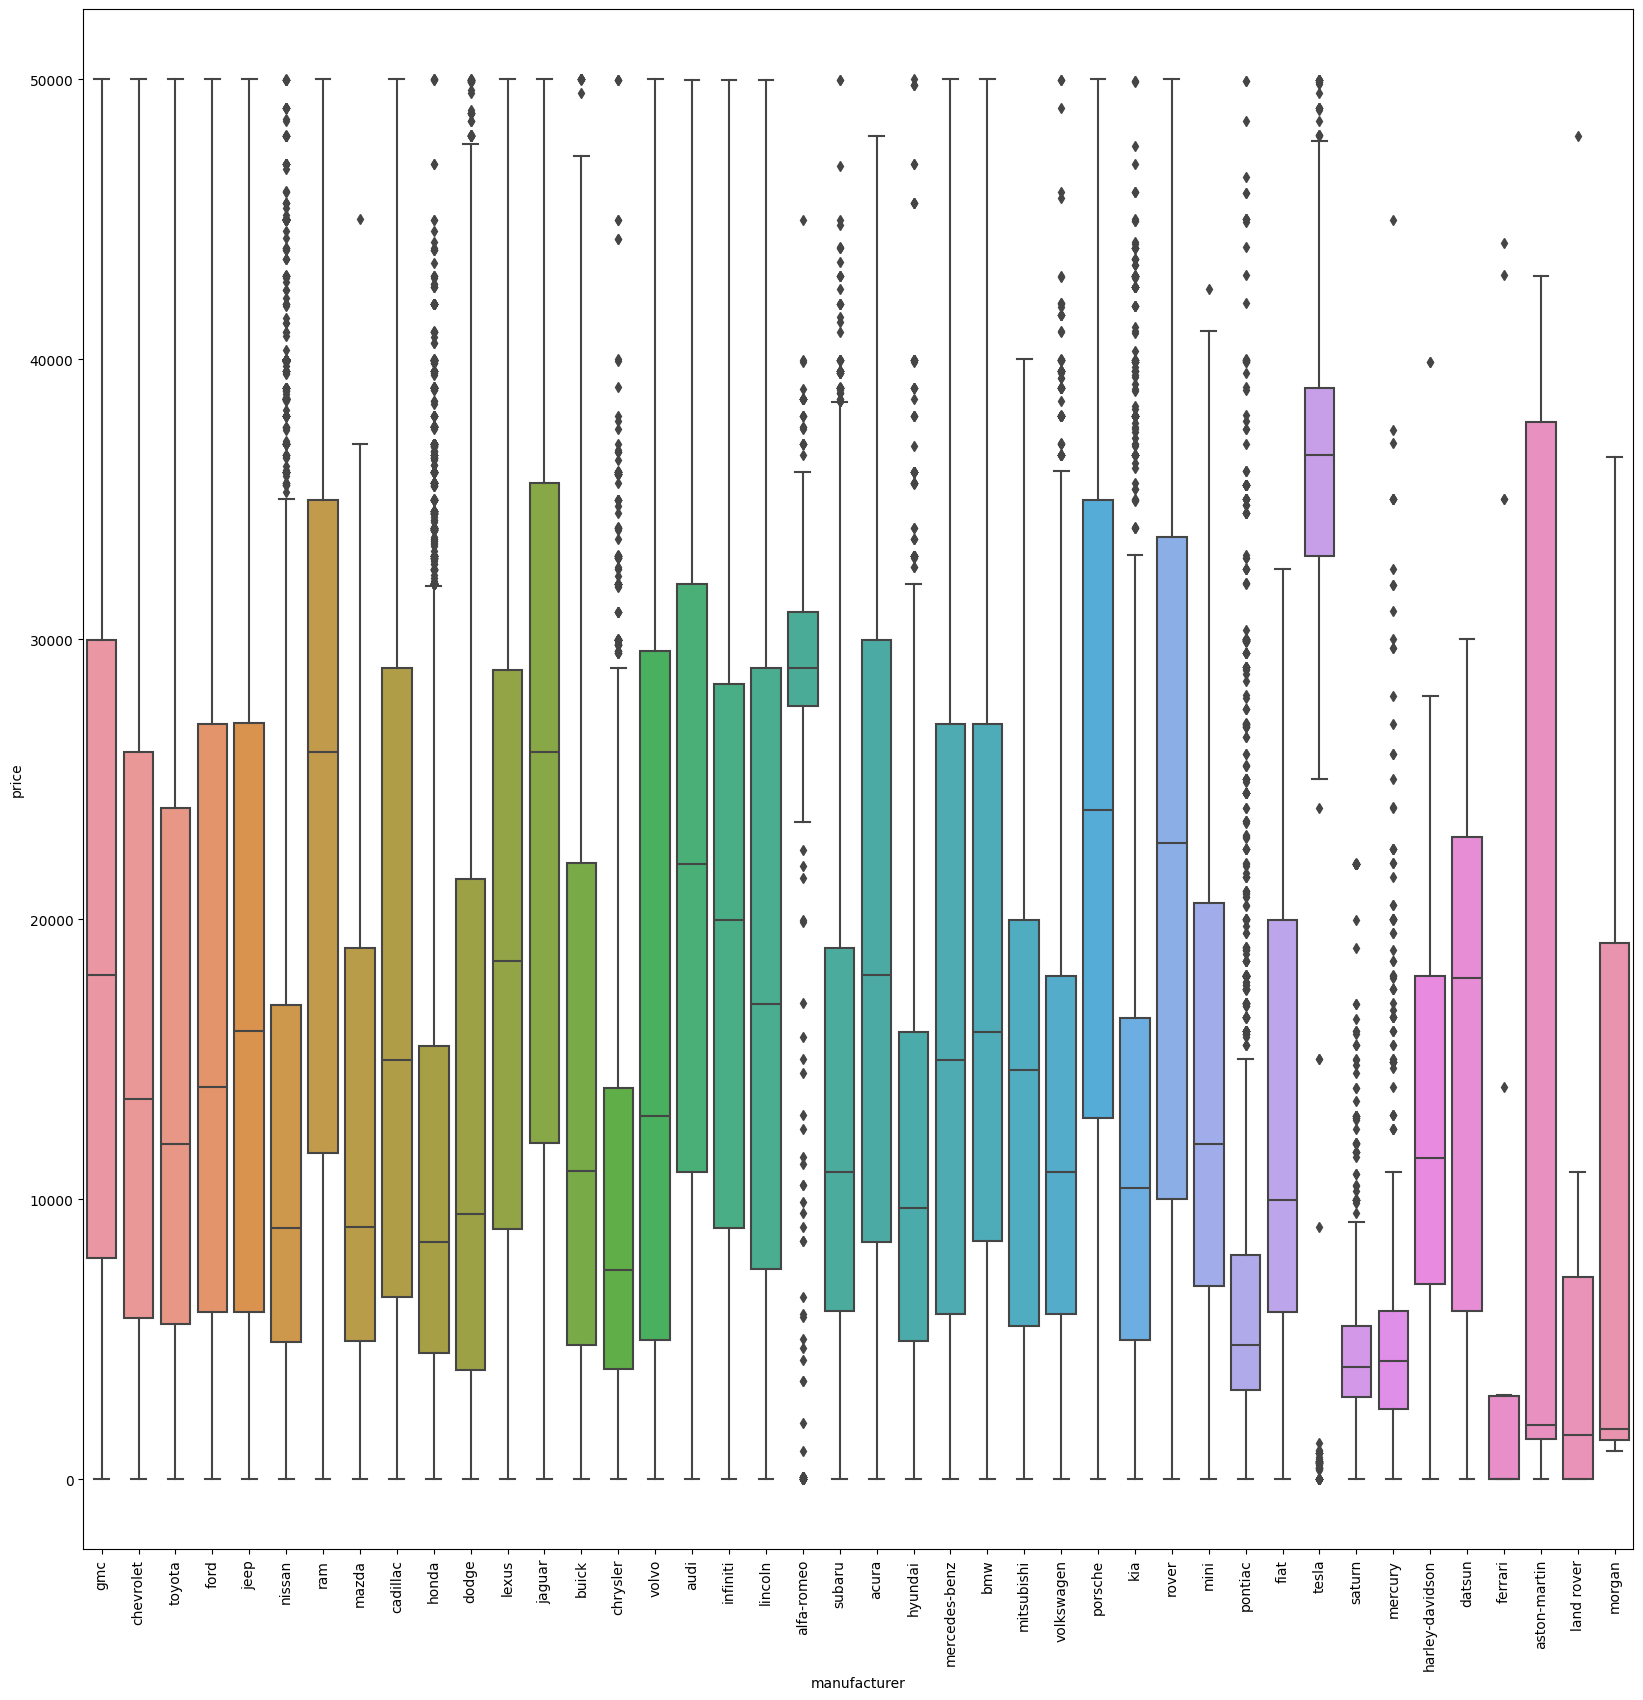

In [13]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df.query('price <= 50000'), x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

This box plot has a lot going on, but it still shows that manufacturer is a relevant variable in predicting price. Although there isn't a lot of data for some of the manufacturers, in general, the averages and interquartile regions match up with what we would expect given the reputation of these car manufacturers. For example, Tesla has a reputation for making expensive vehicles, and they show up on the box plot as having considerably higher prices than most other manufacturers. 

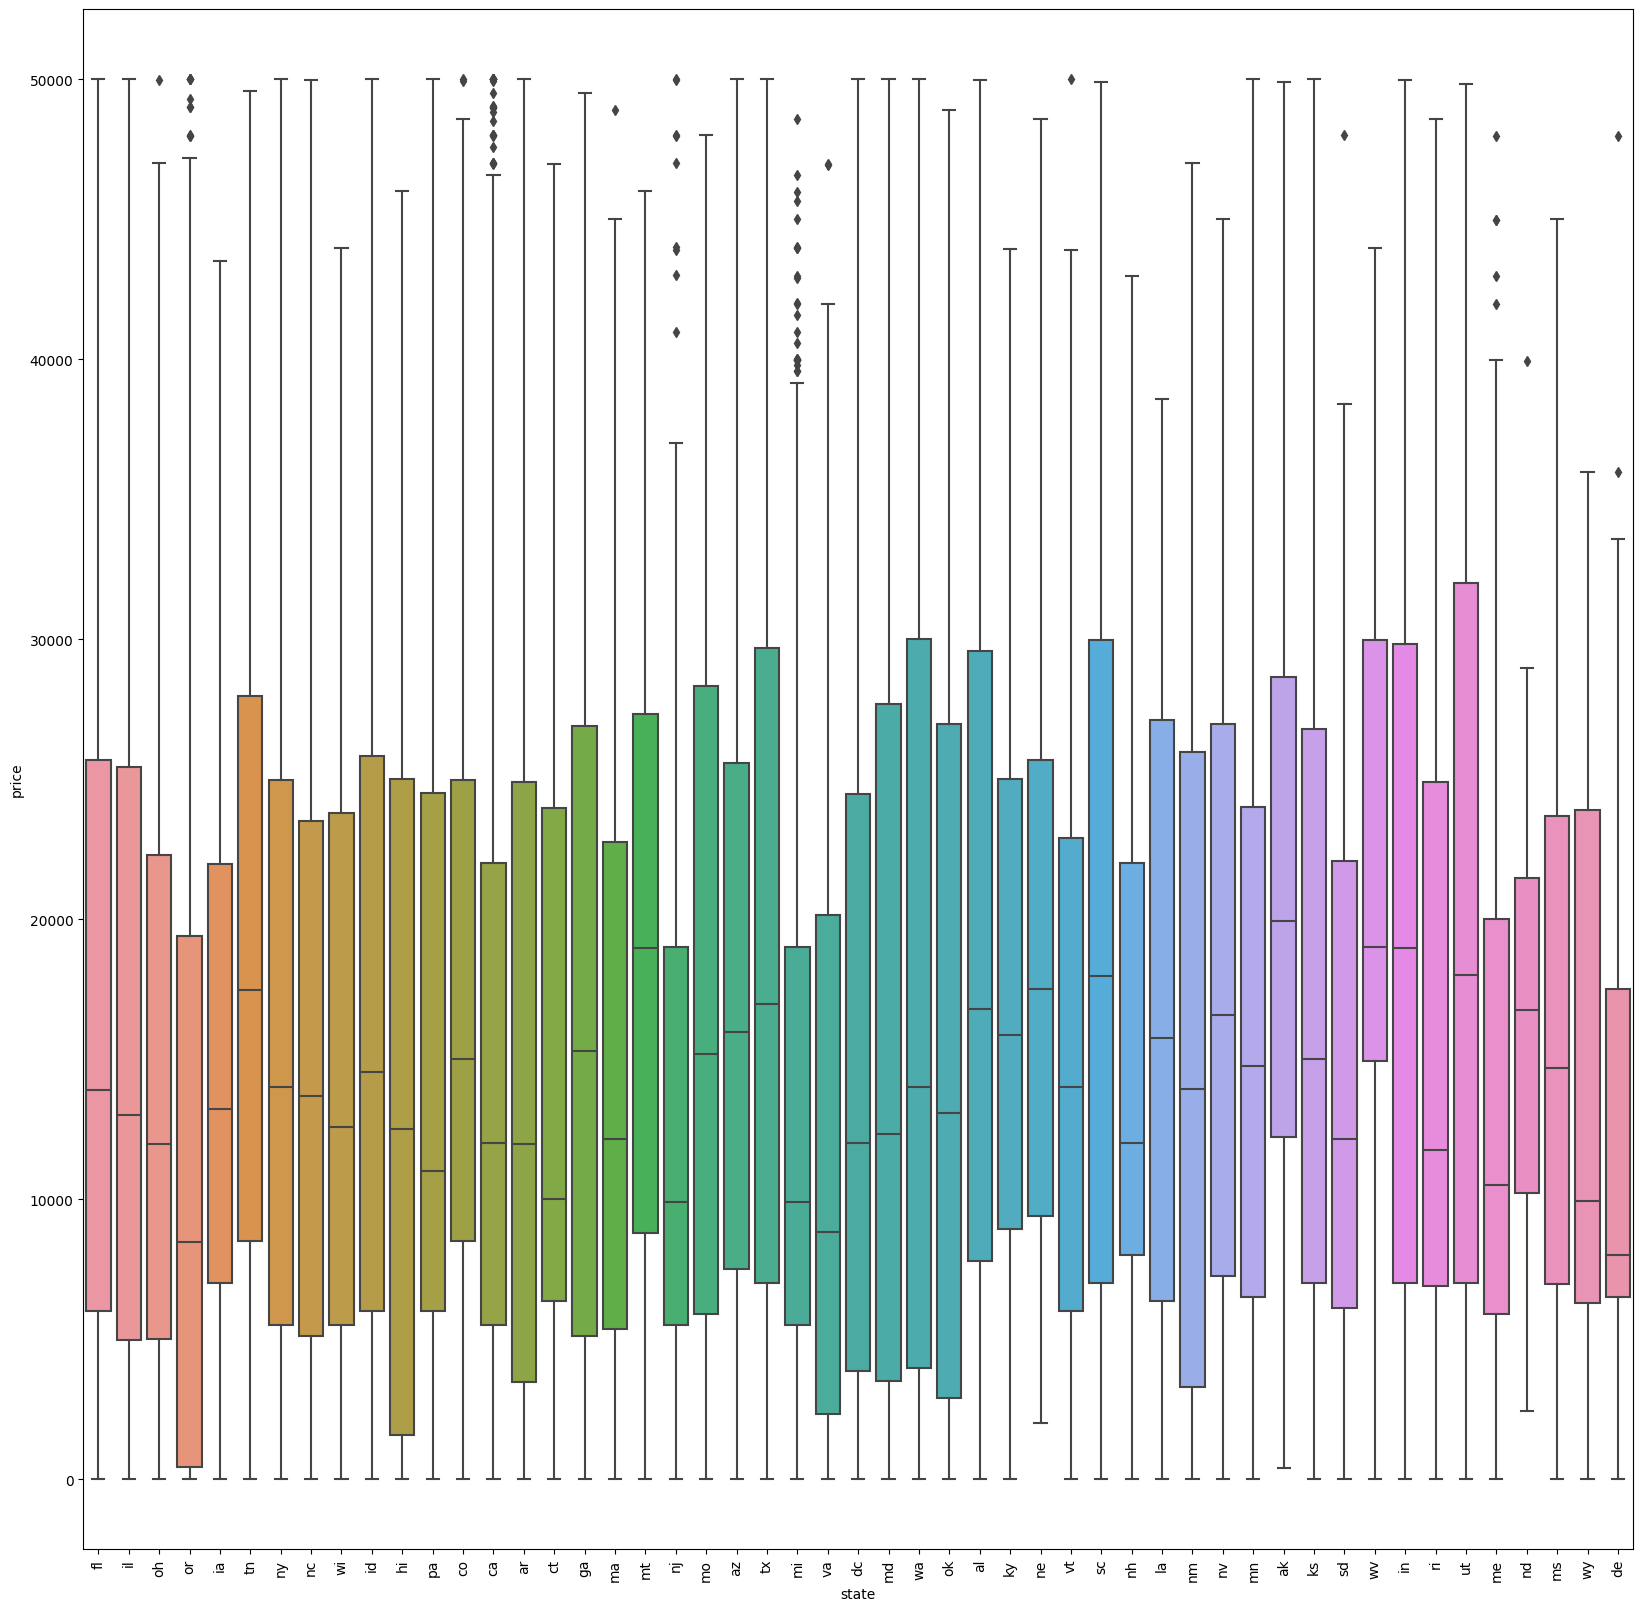

In [14]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_ss.query('price <= 50000'), x='state', y='price')
plt.xticks(rotation=90)
plt.show()

State does not appear to be a very relevant feature for the prediction task. There is some variability, but no more than what we would expect. 

To summarize Step 1 (Identify Features), it appears that year, odometer, cylinders, condition, fuel, title_status, transmission, and manufacturer are some of the most relevant features for the prediction task. This is supported by the visualizations shown above. The category "description" has been excluded because it sometimes leaks target information (sometimes people listing their vehicle on Craigslist put the desired price in the description). 

## Step 2: Preprocessing and Baseline Model

### Do an initial selection of features: 

I'm going to exclude some of the features that I found to be less relevant in step 1.

In [15]:
df_2 = df.drop(columns=['id', 'url', 'region', 'region_url', 'lat', 'long', 'model', 'VIN', 'image_url', 'posting_date',])

### Do appropriate preprocessing:

For the baseline model, I am going to drop all rows that have missing values (for step 3 I will consider imputing, but for the baseline model I am just going to drop them). Additionally, I will drop any vehicles where price is equal to 0, and any vehicles with price greater than 50,000. This will ensure that outliers do not have a disproportionate impact on the model. 

In [16]:
df_2.dropna(inplace=True)
df_2 = df_2[df_2['price'] != 0]
df_2 = df_2[df_2['price'] <= 50000]

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75462 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         75462 non-null  int64  
 1   year          75462 non-null  float64
 2   manufacturer  75462 non-null  object 
 3   condition     75462 non-null  object 
 4   cylinders     75462 non-null  object 
 5   fuel          75462 non-null  object 
 6   odometer      75462 non-null  float64
 7   title_status  75462 non-null  object 
 8   transmission  75462 non-null  object 
 9   drive         75462 non-null  object 
 10  size          75462 non-null  object 
 11  type          75462 non-null  object 
 12  paint_color   75462 non-null  object 
 13  state         75462 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 8.6+ MB


Dropping irrelevant columns and dropping any vehicles that have missing values leaves me with 80,170 vehicles, about 1/5 of the size of the original data set. I will use this for my baseline model. 

Next I need to preprocess the categorical variables using encoding methods. For the baseline model, I will use OneHotEncoder for the categorical variables. Before encoding, I will separate the target from the features and use train_test_split to form a training and testing set. 

In [17]:
y = df_2.loc[:, 'price']
X = df_2.loc[:, df_2.columns != 'price']

#New list of categorical and numeric vars in this baseline model: 
cat_features = []
num_features = []

for column in X:
    if X[column].dtype == 'float64' or df[column].dtype == 'int64':
        num_features.append(column)
    else:
        cat_features.append(column)
        
#Split into train and test set: 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#transformer pipelines for categorical and numeric columns:
cat_transformer = Pipeline(
    steps = [("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

ct = ColumnTransformer(
    transformers = [
        ("cat", cat_transformer, cat_features),
        ("num", num_transformer, num_features)
    ])

### Evaluate a Linear Model

First I will evaluate it without cross validation, and then I will add cross validation. 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import KFold, cross_val_predict

ols = Pipeline(
    steps = [("preprocess", ct), ("model", LinearRegression())])

ols.fit(X_train, y_train)
y_hat = ols.predict(X_test)

print('MSE:',mse(y_test, y_hat))
print('RMSE:',np.sqrt(mse(y_test, y_hat)))
print('R-Squared:',r2(y_test, y_hat))





MSE: 61186142.66717574
RMSE: 7822.15716200945
R-Squared: 0.4325430215762791


### Cross-Validating Linear Model

In [19]:
from sklearn.base import clone

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kfolds.split(X_train, y_train):
    ols_cloned = clone(ols)
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]

    # Clone the original pipeline to ensure a fresh model for each fold
    ols_cloned = clone(ols)

    ols_cloned.fit(X_train_fold, y_train_fold)
    y_hat_fold = ols_cloned.predict(X_test_fold)

    mse_scores.append(mse(y_test_fold, y_hat_fold))
    rmse_scores.append(np.sqrt(mse(y_test_fold, y_hat_fold)))
    r2_scores.append(r2(y_test_fold, y_hat_fold))

print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average R-Squared:", np.mean(r2_scores))
    

Average MSE: 60174660.35944287
Average RMSE: 7756.9345679548205
Average R-Squared: 0.4458909229399522


The results are similar (probably because we are working with such a large data set). This baseline is producing an R-Squared value of about 0.44, meaning that 44% of the variation in price can be explained by the features included in the model. It also is producing an RMSE of about 7786, meaning that on average the model's price prediction is about $7786 off from the actual price of a used car. 

Next, I will try to improve the model through Feature Engineering. 

### Step 3: Feature Engineering

### Perform more in-depth preprocessing and data cleaning. 

I'm going to go back to the original data frame and restart the cleaning and preprocessing step to see if I can improve model performance. 

In [20]:
#First, drop irrelevant columns: 

df_3 = df.drop(columns=['id', 'url', 'region_url', 'lat', 'long', 'VIN', 'image_url','posting_date','state','region','model'])

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


Next, let's split the features into categories: numeric, ordinal, or nominal. I will handle missing values and encode these variables differently. 

In [21]:
num_vars = ['year', 'odometer']
ord_vars = ['condition','size']
nom_vars = ['manufacturer','fuel','cylinders','title_status','transmission', 
            'drive','type', 'paint_color']



In-Depth Preprocessing: Handling Outliers for Numeric Variables

In [22]:
#First, deal with outliers in the target variable:
#Drop all rows with price equal to 0
df_3 = df_3[df_3['price'] != 0]

#Drop high outliers for 'price' using IQR method: 

Q1 = df_3['price'].quantile(0.25)
Q3 = df_3['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)

df_3 = df_3[df_3['price'] < upper_bound]

#For year, we don't want to get rid of the most recent years, but we might want to get rid of the really old years. 
#Drop low outliers for 'year' using IQR method: 

Q1 = df_3['year'].quantile(0.25)
Q3 = df_3['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)

df_3 = df_3[df_3['year'] > lower_bound]

#Finally, for odometer, we can drop the really high odometer milages using IQR method: 

Q1 = df_3['odometer'].quantile(0.25)
Q3 = df_3['odometer'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)

df_3 = df_3[df_3['odometer'] < upper_bound]

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364750 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         364750 non-null  int64  
 1   year          364750 non-null  float64
 2   manufacturer  353549 non-null  object 
 3   condition     225373 non-null  object 
 4   cylinders     215048 non-null  object 
 5   fuel          362674 non-null  object 
 6   odometer      364750 non-null  float64
 7   title_status  357772 non-null  object 
 8   transmission  363319 non-null  object 
 9   drive         253632 non-null  object 
 10  size          101385 non-null  object 
 11  type          288428 non-null  object 
 12  paint_color   257600 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 39.0+ MB


After eliminating outliers, we are left with 359,932 observations. Next let's deal with missing data.

The info() command above shows us the non-null count for each feature. 

It appears that region, price, year, odometer, and state all have no missing values. 

Manufacturer, model, fuel, title_status, and transmission all have minimal missing values (less than 10,000 observations missing). As such, I will drop all rows with missing values for these variables. 

In [23]:
col_list = ['manufacturer', 'fuel', 'title_status', 'transmission']
df_3.dropna(subset=col_list, inplace=True)

Finally, the variables condition, cylinders, drive, size, type, and paint_color all have a significant amount of missing values. I will impute these values using SimpleImputer

In [24]:
columns_to_impute = ['condition', 'cylinders', 'drive', 'size', 'type', 'paint_color']

imputer = SimpleImputer(strategy='most_frequent')

df_3[columns_to_impute] = imputer.fit_transform(df_3[columns_to_impute])

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343897 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         343897 non-null  int64  
 1   year          343897 non-null  float64
 2   manufacturer  343897 non-null  object 
 3   condition     343897 non-null  object 
 4   cylinders     343897 non-null  object 
 5   fuel          343897 non-null  object 
 6   odometer      343897 non-null  float64
 7   title_status  343897 non-null  object 
 8   transmission  343897 non-null  object 
 9   drive         343897 non-null  object 
 10  size          343897 non-null  object 
 11  type          343897 non-null  object 
 12  paint_color   343897 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 36.7+ MB


### Create derived features. In particular, think about whether adding interactions (for example using PolynomialFeatures or manually) might help.

Since we know that year and odometer are both correlated to the target variable, I am going to first create an interaction variable called miles_per_year, which will represent the average amount of miles driven for a vehicle on a per year basis. 

In [25]:
import datetime

#miles_per_year interaction term is created by dividing the total amount of odometer miles by the car's current age.
df_3['miles_per_year'] = df_3['odometer'] / (datetime.datetime.now().year - df_3['year'])
num_vars.append('miles_per_year')

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343897 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           343897 non-null  int64  
 1   year            343897 non-null  float64
 2   manufacturer    343897 non-null  object 
 3   condition       343897 non-null  object 
 4   cylinders       343897 non-null  object 
 5   fuel            343897 non-null  object 
 6   odometer        343897 non-null  float64
 7   title_status    343897 non-null  object 
 8   transmission    343897 non-null  object 
 9   drive           343897 non-null  object 
 10  size            343897 non-null  object 
 11  type            343897 non-null  object 
 12  paint_color     343897 non-null  object 
 13  miles_per_year  343897 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 39.4+ MB


Next, I'll use PolynomialFeatures on the numeric variables: 

In [26]:
from sklearn.preprocessing import PolynomialFeatures

X_num = df_3[num_vars]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_num)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_num.columns))
df_3 = df_3.drop(columns=num_vars)
df_3 = df_3.reset_index(drop=True)
df_3 = pd.concat([df_3, X_poly_df], axis=1)

for col in X_poly_df.columns:
    if col not in num_vars:
        num_vars.append(col)

print(num_vars)


['year', 'odometer', 'miles_per_year', 'year^2', 'year odometer', 'year miles_per_year', 'odometer^2', 'odometer miles_per_year', 'miles_per_year^2']


In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343897 entries, 0 to 343896
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    343897 non-null  int64  
 1   manufacturer             343897 non-null  object 
 2   condition                343897 non-null  object 
 3   cylinders                343897 non-null  object 
 4   fuel                     343897 non-null  object 
 5   title_status             343897 non-null  object 
 6   transmission             343897 non-null  object 
 7   drive                    343897 non-null  object 
 8   size                     343897 non-null  object 
 9   type                     343897 non-null  object 
 10  paint_color              343897 non-null  object 
 11  year                     343897 non-null  float64
 12  odometer                 343897 non-null  float64
 13  miles_per_year           343897 non-null  float64
 14  year

### Think about how to encode categorical variables

I have already separated my variables into numeric, categorical-ordinal, and categorical-nominal. I want to scale my numeric variables, impute my ordinal variables using OrdinalEncoder, and impute my nominal variables using OneHotEncoder.

In [28]:
y = df_3.loc[:, 'price']
X = df_3.loc[:, df_3.columns != 'price']
        
#Split into train and test set: 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#transformer pipelines for numeric, ordinal, and nominal columns:


num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

nom_transformer = Pipeline(
    steps = [("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

ord_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder(
            categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                        ['sub-compact', 'compact', 'mid-size', 'full-size']]
        ))
    ])

ct = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_vars),
        ("nom", nom_transformer, nom_vars),
        ("ord", ord_transformer, ord_vars)
    ])

### Does this improve your model?

In [29]:
ols2 = Pipeline(
    steps = [("preprocess", ct), ("model", LinearRegression())])

ols2.fit(X_train, y_train)
y_hat = ols2.predict(X_test)

print('MSE:',mse(y_test, y_hat))
print('RMSE:',np.sqrt(mse(y_test, y_hat)))
print('R-Squared:',r2(y_test, y_hat))

MSE: 52576171.47199767
RMSE: 7250.942798836416
R-Squared: 0.6792050456070392


The updated model with interaction terms, polynomial features, and more in-depth preprocessing performs better than the baseline model. The MSE and RMSE both decreased, and the R-Squared went up considerably, meaning more of the variation in price is able to be explained by the features in the second model compared to the baseline model. 

# Step 4: Any Model

### Use any regression model provided by Python to improve your result. You can (and probably should) change your preprocessing and feature engineering to be suitable for the model.  Tune parameters as appropriate. 

I want to use RandomForestRegressor as the first model I test. The problem is, tuning the hyperparameters for RandomForest can take a long time. I'm going to address this by tuning the hyperparameters on a subsampled version of the datafrane, and then applying the best parameters to a larger section of my dataframe. 

In [30]:
from sklearn.ensemble import RandomForestRegressor

#Subsampled DataFrame:
df_small = df_3.sample(10000, random_state = 42)

#Split into train and test:
y = df_small.loc[:, 'price']
X = df_small.loc[:, df_small.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

Tweak Preprocessing and Feature Engineering Process to make it more suitable for Random Forest. 

One of the key changes I'm making is that I'm going to use TargetEncoder instead of OneHotEncoder for the nominal variables. This will limit the amount of dummy variables created, and keep my dataset as compacted as possible, since RandomForest already takes quite a long time to run. 

In [31]:
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

nom_transformer = Pipeline(steps=[
    ("encoder", TargetEncoder(target_type='continuous'))
])

ord_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder(
        categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                    ['sub-compact', 'compact', 'mid-size', 'full-size']]
    ))
])

ct = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_vars),
        ("nom", nom_transformer, nom_vars),
        ("ord", ord_transformer, ord_vars)
    ])

Next let's tune the hyperparameters using RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

rf = Pipeline(
    steps = [("preprocess", ct), ("model", RandomForestRegressor())])

# Create the random grid
random_grid = {
    'model__n_estimators': [int(x) for x in np.linspace(start=200, stop=1000, num=5)],
    'model__max_depth': [int(x) for x in np.linspace(10, 50, num=5)],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

rs = RandomizedSearchCV(rf, random_grid, cv=3, n_jobs=-1, verbose=0, random_state=42)

rf_best_model = rs.fit(X_train, y_train)
rf_best_params = rf_best_model.best_params_
print("Best Parameters:", rf_best_params)

Best Parameters: {'model__n_estimators': 1000, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 40, 'model__bootstrap': True}


Now that we've obtained the best parameters, let's use those parameters and apply them to a larger section of the data. 

In [33]:
#Larger section of our data:
df_large = df_3.sample(100000, random_state = 42)

#New y and X:
y = df_large.loc[:, 'price']
X = df_large.loc[:, df_large.columns != 'price']

#New train test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [34]:
#New Random Forest model using the best parameters we previously obtained:
rf2 = RandomForestRegressor(
    n_estimators=rf_best_params['model__n_estimators'],
    max_depth=rf_best_params['model__max_depth'],
    min_samples_split=rf_best_params['model__min_samples_split'],
    min_samples_leaf=rf_best_params['model__min_samples_leaf'],
    bootstrap=rf_best_params['model__bootstrap']
)

new_rf = Pipeline(
    steps =[("preprocess", ct), ("model", rf2)])

new_rf.fit(X_train, y_train)
y_hat = new_rf.predict(X_test)

print('Random Forest MSE:',mse(y_test, y_hat))
print('Random Forest RMSE:',np.sqrt(mse(y_test, y_hat)))
print('Random Forest R-Squared:',r2(y_test, y_hat))

Random Forest MSE: 31098401.74227241
Random Forest RMSE: 5576.594098755298
Random Forest R-Squared: 0.8114354736385966


The Random Forest Regressor performs much better than the Linear Regression model. This model is able to obtain the highest R-squared value and the lowest RMSE value out of all the models tested so far. 

Next I will try one other model, Gradient Boosting Regressor. Similar to Random Forest, Gradient Boosting Regressor is computationally expensive given how large the data set is. I am going to tune the hyperparameters on a subsampled portion of the data frame, and then evaluate the model performance using those hyperparameters on a larger portion of the data frame. 

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

y = df_small.loc[:, 'price']
X = df_small.loc[:, df_small.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

gbr = Pipeline(
    steps = [("preprocess", ct), ("model", GradientBoostingRegressor())])

#Create the random grid
random_grid = {
    'model__n_estimators': [500,1000],
    'model__learning_rate': [0.02, 0.05],
    'model__max_depth': [1,2],
    'model__min_samples_leaf': [5,10],
    'model__min_samples_split': [5,10]
}

rs = RandomizedSearchCV(gbr, random_grid, cv=3, n_iter=3, n_jobs=-1, verbose=0, random_state=42)

best_model = rs.fit(X_train, y_train)
best_params = best_model.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'model__n_estimators': 1000, 'model__min_samples_split': 5, 'model__min_samples_leaf': 10, 'model__max_depth': 2, 'model__learning_rate': 0.05}


In [36]:
#New y and X:

y = df_large.loc[:, 'price']
X = df_large.loc[:, df_large.columns != 'price']

#New train test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#New GBR model using the best parameters I previously obtained: 
gbr2 = GradientBoostingRegressor(
    n_estimators = best_params['model__n_estimators'],
    learning_rate = best_params['model__learning_rate'],
    max_depth = best_params['model__max_depth'],
    min_samples_leaf = best_params['model__min_samples_leaf'],
    min_samples_split = best_params['model__min_samples_split'])

new_gbr = Pipeline(
    steps = [("preprocess", ct), ("model", gbr2)])

new_gbr.fit(X_train, y_train)
y_hat = new_gbr.predict(X_test)

print('Gradient Boosting Regressor MSE:', mse(y_test, y_hat))
print('Gradient Boosting Regressor RMSE:', np.sqrt(mse(y_test, y_hat)))
print('Gradient Boosting Regressor R-Squared:', r2(y_test, y_hat))


Gradient Boosting Regressor MSE: 45345394.66117922
Gradient Boosting Regressor RMSE: 6733.898919732848
Gradient Boosting Regressor R-Squared: 0.7250491218867581


The GBR model performs better than the Linear Regression model, but not as well as the Random Forest model. 

# Step 5: Feature Selection

### Identify features that are important for your best model. Which features are most influential, and which features could be removed without decrease in performance? Does removing irrelevant features make your model better?

My best model was random forest, so I will look at which features are most important for this model. 

In [37]:
feat_imp_rf = new_rf.named_steps['model'].feature_importances_

rf_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': feat_imp_rf})
rf_imp = rf_imp.sort_values(by='Importance', ascending=False)

print(rf_imp)

                    Feature  Importance
3                      fuel    0.213264
0              manufacturer    0.211325
15      year miles_per_year    0.122155
9               paint_color    0.098650
10                     year    0.066042
11                 odometer    0.047850
1                 condition    0.032113
6                     drive    0.031473
14            year odometer    0.028231
4              title_status    0.026575
7                      size    0.021866
16               odometer^2    0.020610
5              transmission    0.015377
2                 cylinders    0.014985
8                      type    0.014684
13                   year^2    0.013408
17  odometer miles_per_year    0.009767
12           miles_per_year    0.006505
18         miles_per_year^2    0.005120


Now I can drop the least important features and see how this impacts model performance. 

In [38]:
feat_to_drop = list(rf_imp.loc[rf_imp['Importance'] < 0.01, 'Feature'])

rf_df = df_large.drop(columns=[i for i in feat_to_drop])

num_vars_rf = [var for var in num_vars if var not in feat_to_drop]
ord_vars_rf = [var for var in ord_vars if var not in feat_to_drop]
nom_vars_rf = [var for var in nom_vars if var not in feat_to_drop]

y = rf_df.loc[:, 'price']
X = rf_df.loc[:, rf_df.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [39]:
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

nom_transformer = Pipeline(steps=[
    ("encoder", TargetEncoder(target_type='continuous'))
])

ord_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder(
        categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                    ['sub-compact', 'compact', 'mid-size', 'full-size']]
    ))
])

ct = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_vars_rf),
        ("nom", nom_transformer, nom_vars_rf),
        ("ord", ord_transformer, ord_vars_rf)
    ])

In [40]:
rf3 = RandomForestRegressor(
    n_estimators=rf_best_params['model__n_estimators'],
    max_depth=rf_best_params['model__max_depth'],
    min_samples_split=rf_best_params['model__min_samples_split'],
    min_samples_leaf=rf_best_params['model__min_samples_leaf'],
    bootstrap=rf_best_params['model__bootstrap']
)


rf_final = Pipeline(
    steps =[("preprocess", ct), ("model", rf3)])

rf_final.fit(X_train, y_train)
y_hat = rf_final.predict(X_test)

print('Random Forest MSE:',mse(y_test, y_hat))
print('Random Forest RMSE:',np.sqrt(mse(y_test, y_hat)))
print('Random Forest R-Squared:',r2(y_test, y_hat))

Random Forest MSE: 31096967.06090909
Random Forest RMSE: 5576.46546307866
Random Forest R-Squared: 0.8114441727998588


Removing irrelevant features very slightly improved model performance.

# Question 2: K-Means Clustering (40 points)

### Load the Wisconsin Diagnostic Breast Cancer dataset

In [41]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

X.info()

y.info()

#Because the KMeans algorithm involves distance, I will scale the X values before clustering:
X = X.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

### Implement a function that performs K-means clustering from scratch

This will involve:

1. Initilize cluster centers
2. Repeat until converged: 
    - Assign each data point to the nearest centroid
    - Update centroids (set to the mean of each cluster)

In [42]:
#Global helper function for Euclidian Distance: 
def euc_dist(x1, x2):
    result = np.sqrt(np.sum((x1 - x2) ** 2))
    return result

class KMeans_scratch:
    def __init__(self, K=2, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        
        #sample indices for each cluster:
        self.clusters = [[] for _ in range(self.K)]
        
        # store the mean vector for each cluster:
        self.centroids = []
        
    def kmeans(self, X, random_seed=None):
        self.X = X 
        self.n_samples, self.n_features = X.shape
        
        np.random.seed(random_seed)
    
        # Step 1: Initialize Cluster Centers
        min_val = np.min(X, axis=0)
        max_val = np.max(X, axis=0)
        self.centroids = np.random.uniform(low=min_val, high=max_val, size=(self.K, self.n_features))
    
        
        # Step 2: Repeat until Converged
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            self.clusters = self._cluster(self.centroids)
            
            # Update Centroids
            old_centroids = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            #Check for convergence
            if self._is_converged(old_centroids, self.centroids):
                break
                
        # Label clusters to check for accuracy: 
        return self._get_labels(self.clusters)
    
    #Helper Functions:         
    def _cluster(self, centroids):
        # Assign each data point to the closest centroid: 
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _get_centroids(self, clusters):
        #assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, old_centroids, centroids):
        # Check if centroids changed:
        distances = [euc_dist(old_centroids[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def _get_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = self.K - cluster_idx - 1
                
        return labels
    
    def _closest_centroid(self, sample, centroids):
        # distance of the current data point to each centroid
        distances = [euc_dist(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


### Without the class label, run your algorithm. Then compare with the class labels, what is the accuracy of your algorithm?

In [43]:
# Convert labels 'B' and 'M' to 0 and 1
label_mapping = {'B': 0, 'M': 1}
y = y.replace(label_mapping)

# Run K-means algorithm
k = KMeans_scratch(K=2, max_iters=150)
prediction = k.kmeans(X)

# Print K-means predictions and true labels
print("K-means Predictions:")
print(prediction)

print("True Labels:")
print(y.values.ravel())

# Calculate accuracy
accuracy = np.mean(prediction == y.values.ravel()) * 100
print(f"\nAccuracy: {accuracy:.2f}%")

K-means Predictions:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.

The accuracy turned out to be just over 91%, so K-Means did a pretty good job clustering the data points into 2 groups that were similar to the benign and malignant labeled data points. 

### Run your algorithm several times, starting with different centers. Do your results change depending on this? Explain. 

In [44]:
for i in range(20):
    k = KMeans_scratch(K=2, max_iters=150)
    
    #Since the prediction function uses random seed to initialize clusters, we can change the random seed each time
    #to ensure that it is a different center each time. 
    prediction = k.kmeans(X, random_seed=i)
    results = (np.mean(prediction == y.values.ravel()))
               
    #Since K-Means is unsupervised, there's a chance it switches the labels. This code accounts for that:
    if results >= 0.5:
        accuracy = results*100
    else: 
        accuracy = (1-results)*100
    print(f"Run {i+1} Accuracy: {accuracy:.2f}%")

Run 1 Accuracy: 91.21%
Run 2 Accuracy: 91.21%
Run 3 Accuracy: 62.74%
Run 4 Accuracy: 91.21%
Run 5 Accuracy: 91.21%
Run 6 Accuracy: 62.74%
Run 7 Accuracy: 91.21%
Run 8 Accuracy: 90.51%
Run 9 Accuracy: 90.51%
Run 10 Accuracy: 91.04%
Run 11 Accuracy: 91.04%
Run 12 Accuracy: 90.51%
Run 13 Accuracy: 91.04%
Run 14 Accuracy: 91.21%
Run 15 Accuracy: 91.21%
Run 16 Accuracy: 91.21%
Run 17 Accuracy: 91.21%
Run 18 Accuracy: 91.04%
Run 19 Accuracy: 91.21%
Run 20 Accuracy: 62.74%


Running the algorithm 20 times, you can see that the algorithm DID perform differently depending on the initial centroid locations. There were even a few times when the clustering resulted in only 62.74% accuracy. This shows that K-Means is sensitive to the initial centroid locations, which is a downside to this method because these locations are arbitrary unless you use a method like farthest first sampling instead of randomly assigning centroid location. 

### Can you get a better result using a supervised method?

I'm going to use the method DecisionTreeClassifier.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

# Now do the cross validation:

tree_model = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_model,param_grid=param_dict, cv=10, verbose=1)
best_model=grid_search.fit(X_train, y_train)

print("Accuracy: {:.3f}%".format(best_model.score(X_test, y_test)*100))


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Accuracy: 95.105%


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

def fit_poly():
    degrees = [1,3,6,9]  
    output_array = np.zeros((4,100))
    
    for i, j in enumerate(degrees):
        poly = PolynomialFeatures(degree=j, include_bias = False)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        ols = LinearRegression()
        ols.fit(X_poly, y_train)
        y_pred = ols.predict(poly.fit_transform(np.linspace(0, 10, 100).reshape(100,1)))
        output_array[i,:] = y_pred
    return output_array


In [4]:
output = fit_poly()
print(output.shape)

(4, 100)


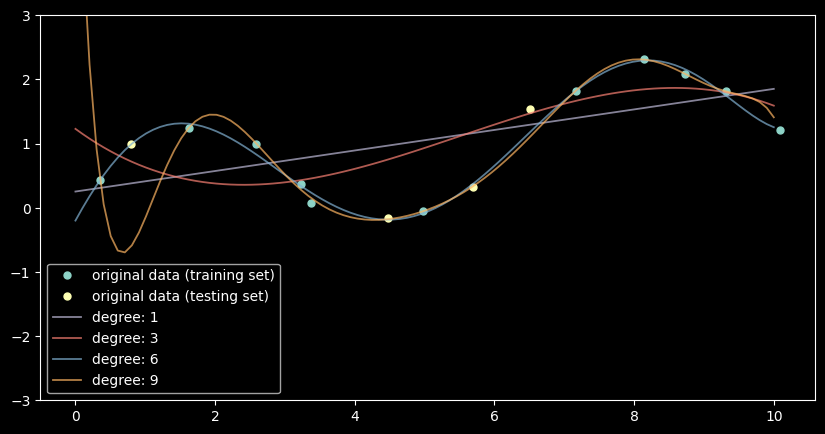

In [5]:
def poly_plots(y_preds):
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='original data (training set)', markersize=5)
    plt.plot(X_test, y_test, 'o', label='original data (testing set)', markersize=5)
    
    degrees = [1, 3, 6, 9]
    for i, j in enumerate(degrees):
        plt.plot(np.linspace(0, 10, 100), y_preds[i], alpha=0.7, lw=1.3, label='degree: {}'.format(j))
    
    plt.ylim(-3, 3)
    plt.legend(loc=3)
    plt.show()

poly_plots(output)

Using DecisionTreeClassifier, I was able to achieve a better result, improving from 91.21% using K-Means to 95.105% after using GridSearchCV to tune the hyperparameters.